In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

from collections import Counter
import json
import warnings
import datetime

In [2]:
file = "USvideos.csv"

youtube_vids_df = pd.read_csv(file)
youtube_vids_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
warnings.filterwarnings('ignore')

In [4]:
youtube_vids_df.replace({"category_id": {22: "People & Blogs", 1: "Film & Animation", 2: "Auto & Vehicles", 10: "Music", 15: "Pets & Animals", 17:"Sports", 19: "Travel & Events", 20: "Gaming", 23:"Comedy", 24:"Entertainment", 25: "News & Politics", 26: "Howto & Style", 27: "Education", 28: "Science & Technology", 29: "Non-Profits & Activism", 18: "Short Movies", 21: "Videoblogging", 30: "Movies", 31: "Anime/Animation", 32: "Action/Adventure", 33: "Classics", 34: "Comedy", 35: "Documentary", 36: "Drama", 37: "Family", 38: "Foreign", 39: "Horror", 40: "Sci-Fi/Fantasy", 41: "Thriller", 42: "Sports", 43: "Shows", 44: "Trailers"}})

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,Science & Technology,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,Entertainment,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,Science & Technology,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,Film & Animation,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,News & Politics,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [5]:
# Create a group based on the values in the 'category id' column

category_id_group = youtube_vids_df.groupby('category_id').count()['title']
category_id_group

category_id
1     2345
2      384
10    6472
15     920
17    2174
19     402
20     817
22    3210
23    3457
24    9964
25    2487
26    4146
27    1656
28    2401
29      57
43      57
Name: title, dtype: int64

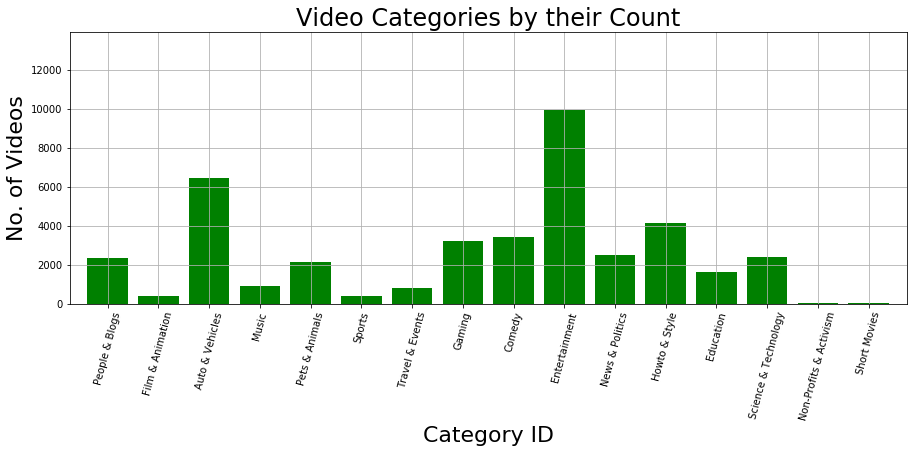

<Figure size 432x288 with 0 Axes>

In [6]:
# Create a bar chart based off the group
plt.figure(figsize=(15,5))
x_axis = np.arange(len(category_id_group))
plt.bar(x_axis, category_id_group, color="green", align="center", alpha=1.0)

# Tell Matplotlib where you would like to place each of our x axis headers

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["People & Blogs", "Film & Animation", "Auto & Vehicles", "Music", "Pets & Animals", "Sports", "Travel & Events", "Gaming", "Comedy", "Entertainment", "News & Politics", "Howto & Style", "Education", "Science & Technology",  "Non-Profits & Activism", "Short Movies", "Videoblogging", "Movies", "Anime/Animation", "Action/Adventure", "Classics", "Comedy", "Documentary", "Drama", "Family", "Foreign", "Horror", "Sci-Fi/Fantasy", "Thriller", "Sports", "Shows", "Trailers"])
plt.xticks(rotation=75)

# Set the x and y limits of the current chart

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(category_id_group)+4000)

# Set the xlabel, ylabel and title

plt.xlabel('Category ID', size = 22)
plt.ylabel('No. of Videos', size = 22)
plt.title('Video Categories by their Count', size = 24)
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.grid()
plt.show()
plt.savefig('Video Categories by their Count.png')


In [7]:
# Find which trending date had the largest number of trending video
youtube_vids_df['trending_date'] = pd.to_datetime(youtube_vids_df['trending_date'], format='%y.%d.%m')
print(youtube_vids_df['trending_date'].head())

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]


In [8]:
# Find which publishing hours had the largest number of trending video
youtube_vids_df['publish_time'] = pd.to_datetime(youtube_vids_df['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
print(youtube_vids_df['publish_time'].head())

0   2017-11-13 17:13:01
1   2017-11-13 07:30:00
2   2017-11-12 19:05:24
3   2017-11-13 11:00:04
4   2017-11-12 18:01:41
Name: publish_time, dtype: datetime64[ns]


In [9]:
# Create a group based on the values in the 'trending_date' column
trending_date_group = youtube_vids_df.groupby('trending_date').count()['title']
trending_date_group

trending_date
2017-11-14    200
2017-11-15    200
2017-11-16    200
2017-11-17    200
2017-11-18    200
2017-11-19    200
2017-11-20    200
2017-11-21    200
2017-11-22    200
2017-11-23    200
2017-11-24    200
2017-11-25    200
2017-11-26    200
2017-11-27    200
2017-11-28    200
2017-11-29    200
2017-11-30    200
2017-12-01    200
2017-12-02    200
2017-12-03    200
2017-12-04    200
2017-12-05    200
2017-12-06    200
2017-12-07    200
2017-12-08    200
2017-12-09    200
2017-12-10    200
2017-12-11    200
2017-12-12    200
2017-12-13    200
             ... 
2018-05-16    200
2018-05-17    200
2018-05-18    200
2018-05-19    200
2018-05-20    200
2018-05-21    200
2018-05-22    200
2018-05-23    200
2018-05-24    200
2018-05-25    200
2018-05-26    200
2018-05-27    200
2018-05-28    200
2018-05-29    200
2018-05-30    200
2018-05-31    200
2018-06-01    200
2018-06-02    200
2018-06-03    200
2018-06-04    200
2018-06-05    200
2018-06-06    200
2018-06-07    200
2018-06-08    

In [10]:
youtube_vids_df.insert(4, 'publish_date', youtube_vids_df['publish_time'].dt.date)
youtube_vids_df['publish_time'] = youtube_vids_df['publish_time'].dt.time
print(youtube_vids_df[['publish_date', 'publish_time']].head())

  publish_date publish_time
0   2017-11-13     17:13:01
1   2017-11-13     07:30:00
2   2017-11-12     19:05:24
3   2017-11-13     11:00:04
4   2017-11-12     18:01:41


In [11]:
# Create a group based on the values in the 'publish_time' column
publish_time_group = youtube_vids_df.groupby('publish_time').count()['views']
publish_time_group

publish_time
00:00:00    34
00:00:01    46
00:00:02    29
00:00:03    24
00:00:04    27
00:00:26     4
00:00:28     2
00:00:41     4
00:01:00    12
00:01:01    13
00:01:03     4
00:01:05     5
00:01:11    12
00:01:39     4
00:01:42     2
00:02:49     5
00:03:46     6
00:03:47     1
00:03:56     9
00:04:08     7
00:04:16     7
00:04:22     1
00:04:28     7
00:05:20     1
00:05:21    14
00:05:23     6
00:05:42    14
00:05:47     2
00:06:03     9
00:06:45     2
            ..
23:49:13     1
23:49:43     4
23:49:46     6
23:49:56    11
23:50:01     9
23:50:14     8
23:50:32     4
23:50:43    12
23:50:47     7
23:51:45    15
23:52:14    20
23:52:38     9
23:53:26     6
23:53:56     3
23:54:08     1
23:54:33     6
23:54:39     1
23:54:43    10
23:55:10     6
23:55:21     7
23:55:56     9
23:55:58     7
23:57:04     4
23:57:32    11
23:57:34     7
23:57:49     1
23:58:50     3
23:59:08     2
23:59:22    13
23:59:24     4
Name: views, Length: 4478, dtype: int64

In [12]:
youtube_vids_df.index.duplicated()

array([False, False, False, ..., False, False, False])

In [13]:
category_count = youtube_vids_df['publish_time'].value_counts()
type(youtube_vids_df['publish_time'])

pandas.core.series.Series

In [14]:
publish_time_group

publish_time
00:00:00    34
00:00:01    46
00:00:02    29
00:00:03    24
00:00:04    27
00:00:26     4
00:00:28     2
00:00:41     4
00:01:00    12
00:01:01    13
00:01:03     4
00:01:05     5
00:01:11    12
00:01:39     4
00:01:42     2
00:02:49     5
00:03:46     6
00:03:47     1
00:03:56     9
00:04:08     7
00:04:16     7
00:04:22     1
00:04:28     7
00:05:20     1
00:05:21    14
00:05:23     6
00:05:42    14
00:05:47     2
00:06:03     9
00:06:45     2
            ..
23:49:13     1
23:49:43     4
23:49:46     6
23:49:56    11
23:50:01     9
23:50:14     8
23:50:32     4
23:50:43    12
23:50:47     7
23:51:45    15
23:52:14    20
23:52:38     9
23:53:26     6
23:53:56     3
23:54:08     1
23:54:33     6
23:54:39     1
23:54:43    10
23:55:10     6
23:55:21     7
23:55:56     9
23:55:58     7
23:57:04     4
23:57:32    11
23:57:34     7
23:57:49     1
23:58:50     3
23:59:08     2
23:59:22    13
23:59:24     4
Name: views, Length: 4478, dtype: int64

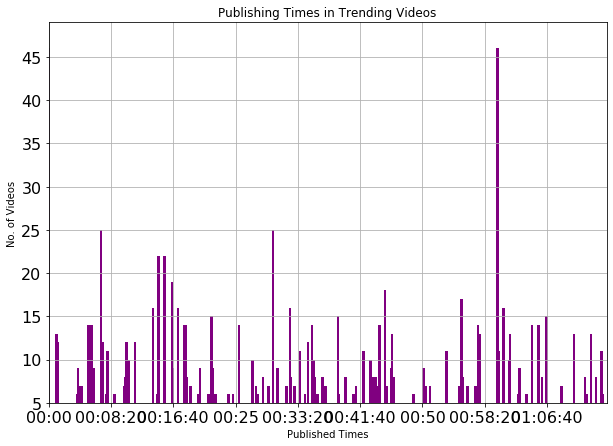

In [15]:

# Create a bar chart based off the group
plt.figure(figsize=(10,7))
x_axis = publish_time_group.index.tolist()
y_axis = publish_time_group.values.tolist()

plt.bar(x_axis, y_axis, color="purple", align="center", alpha=1.0, width=20.0, linewidth=1.0)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+50)

# Set the xlabel, ylabel and title

plt.title('Publishing Times in Trending Videos')
plt.xlabel('Published Times')
plt.ylabel('No. of Videos')
axes = plt.axes()
axes.set_ylim([5,49])

plt.grid()
plt.show()


<Figure size 720x504 with 0 Axes>

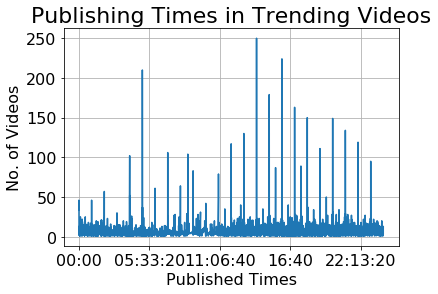

In [16]:
plt.figure(figsize=(10,7))

fig, ax = plt.subplots()
ax.plot(x_axis, y_axis)

# Label axis and give the chart a title
ax.set_title('Publishing Times in Trending Videos', fontsize=22)
ax.set_xlabel('Published Times', fontsize=16)
ax.set_ylabel('No. of Videos', fontsize=16)

plt.grid()
plt.savefig('Publishing Times in Trending Videos.png')

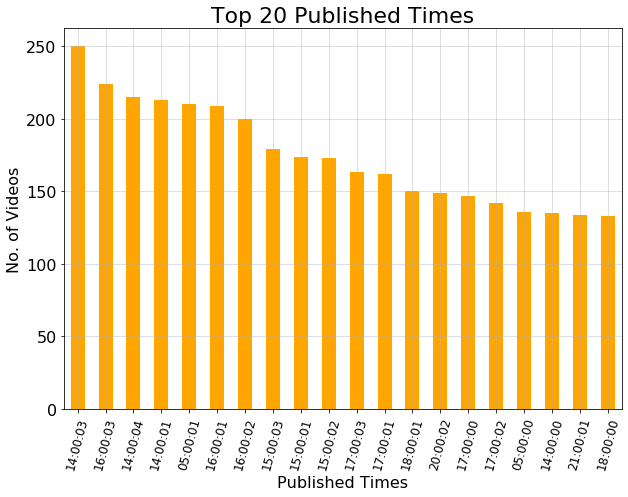

<Figure size 432x288 with 0 Axes>

In [17]:
#Create a bar graph for top 20 publishing times

ax = category_count[:20].plot.bar(color="orange", figsize=(10,7))
ax.set_xticklabels(labels=category_count.index, rotation=75, fontsize=12)
ax.set_title('Top 20 Published Times', fontsize=22)
ax.set_xlabel('Published Times', fontsize=16)
ax.set_ylabel('No. of Videos', fontsize=16)
ax.tick_params(grid_alpha=0.5)
plt.grid()
plt.show()
plt.savefig('Top20 Publishing Times.png')

In [18]:
youtube_vids_df.count()

video_id                  40949
trending_date             40949
title                     40949
channel_title             40949
publish_date              40949
category_id               40949
publish_time              40949
tags                      40949
views                     40949
likes                     40949
dislikes                  40949
comment_count             40949
thumbnail_link            40949
comments_disabled         40949
ratings_disabled          40949
video_error_or_removed    40949
description               40379
dtype: int64

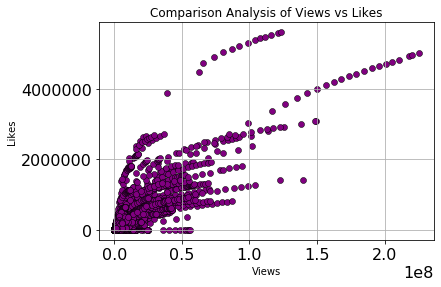

<Figure size 1296x720 with 0 Axes>

In [19]:
# Comparison of views vs. likes

fig, ax = plt.subplots()
_ = plt.scatter(x=youtube_vids_df['views'], y=youtube_vids_df['likes'], color="purple", edgecolors="#000000", linewidths=0.5)
plt.grid()
plt.figure(figsize = (18, 10))
_ = ax.set(xlabel="Views", ylabel="Likes", title="Comparison Analysis of Views vs Likes")



In [20]:
title_words = pd.Series(Counter([y for x in youtube_vids_df ["title"] for y in x.split()]))

title_words.sort_values()

last_count = pd.DataFrame(title_words, index = ["Official", "How", "Signs", "Secret", "Trailer", "!!", "?", "With", "What", "trick", "change", "ft.", "Video", "new"])

last_count = last_count.reset_index()
last_count.columns = ["Words", "Count"]

last_count


,Words,Count
0,Official,1554
1,How,1661
2,Signs,20
3,Secret,147
4,Trailer,1868
5,!!,4
6,?,13
7,With,897
8,What,773
9,trick,10


In [21]:
x_array = []

for i in last_count["Words"]:
    print(i)
    
    x_array.append(i)

Official
How
Signs
Secret
Trailer
!!
?
With
What
trick
change
ft.
Video
new


In [22]:
y_array = []

for i in last_count["Count"]:
    print(i)

    y_array.append(i)

1554
1661
20
147
1868
4
13
897
773
10
21
1017
258
123


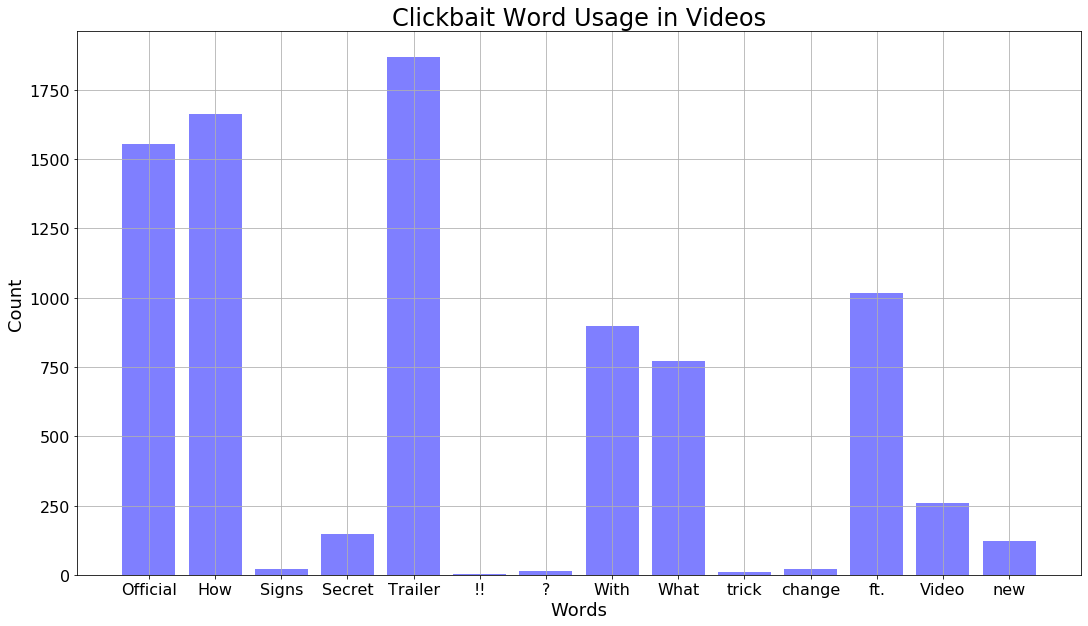

In [23]:
tick_locations = [value for value in np.arange(len(x_array))]
plt.figure(figsize = (18, 10))
plt.xticks(tick_locations, x_array)
plt.bar(x_array, y_array, color= "b", alpha= 0.5, align="center" )

plt.title('Clickbait Word Usage in Videos', fontsize=24)
plt.xlabel('Words', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.grid()

In [24]:
new_df=youtube_vids_df[['title','views']].copy()
new_df

,title,views
0,WE WANT TO TALK ABOUT OUR MARRIAGE,748374
1,The Trump Presidency: Last Week Tonight with J...,2418783
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",3191434
3,Nickelback Lyrics: Real or Fake?,343168
4,I Dare You: GOING BALD!?,2095731
5,2 Weeks with iPhone X,119180
6,Roy Moore & Jeff Sessions Cold Open - SNL,2103417
7,5 Ice Cream Gadgets put to the Test,817732
8,The Greatest Showman | Official Trailer 2 [HD]...,826059
9,Why the rise of the robots won’t mean the end ...,256426


In [25]:
# likes vs. dislikes

def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
        return False

In [26]:
new_df["contains_capitalized_word"] = new_df["title"].apply(contains_capitalized_word)
value_counts = new_df["contains_capitalized_word"].value_counts().to_dict()
new_df

,title,views,contains_capitalized_word
0,WE WANT TO TALK ABOUT OUR MARRIAGE,748374,True
1,The Trump Presidency: Last Week Tonight with J...,2418783,False
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",3191434,False
3,Nickelback Lyrics: Real or Fake?,343168,False
4,I Dare You: GOING BALD!?,2095731,True
5,2 Weeks with iPhone X,119180,False
6,Roy Moore & Jeff Sessions Cold Open - SNL,2103417,False
7,5 Ice Cream Gadgets put to the Test,817732,False
8,The Greatest Showman | Official Trailer 2 [HD]...,826059,False
9,Why the rise of the robots won’t mean the end ...,256426,False


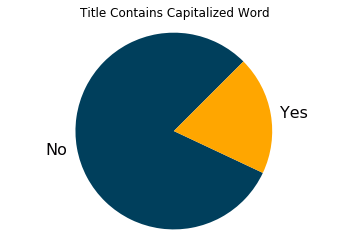

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
_= ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
             colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=
             45)
_=ax.axis('equal')
_=ax.set_title('Title Contains Capitalized Word')
plt.savefig("Pie.png")

In [28]:
#ORIGINAL UNITED STATES DATAFRAME
file = "USvideos.csv"

youtube_vids_df = pd.read_csv(file)
youtube_vids_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [29]:
file = "USvideos.csv"
file_2 = "INvideos.csv"
file_3 = "JPvideos.csv"
file_4 = "KRvideos.csv"
file_5 = "RUvideos.csv"

In [30]:
#UNITED STATES likes vs. dislikes

new_df_US=youtube_vids_df[['video_id','likes', 'dislikes', 'views']].copy()
new_df_US['Country']='United States'
new_df_US

,video_id,likes,dislikes,views,Country
0,2kyS6SvSYSE,57527,2966,748374,United States
1,1ZAPwfrtAFY,97185,6146,2418783,United States
2,5qpjK5DgCt4,146033,5339,3191434,United States
3,puqaWrEC7tY,10172,666,343168,United States
4,d380meD0W0M,132235,1989,2095731,United States
5,gHZ1Qz0KiKM,9763,511,119180,United States
6,39idVpFF7NQ,15993,2445,2103417,United States
7,nc99ccSXST0,23663,778,817732,United States
8,jr9QtXwC9vc,3543,119,826059,United States
9,TUmyygCMMGA,12654,1363,256426,United States


In [31]:
new_df_US['Ratio Likes to Views'] = new_df_US['likes']/new_df_US['views']
new_df_US

,video_id,likes,dislikes,views,Country,Ratio Likes to Views
0,2kyS6SvSYSE,57527,2966,748374,United States,0.076869
1,1ZAPwfrtAFY,97185,6146,2418783,United States,0.040179
2,5qpjK5DgCt4,146033,5339,3191434,United States,0.045758
3,puqaWrEC7tY,10172,666,343168,United States,0.029641
4,d380meD0W0M,132235,1989,2095731,United States,0.063097
5,gHZ1Qz0KiKM,9763,511,119180,United States,0.081918
6,39idVpFF7NQ,15993,2445,2103417,United States,0.007603
7,nc99ccSXST0,23663,778,817732,United States,0.028937
8,jr9QtXwC9vc,3543,119,826059,United States,0.004289
9,TUmyygCMMGA,12654,1363,256426,United States,0.049348


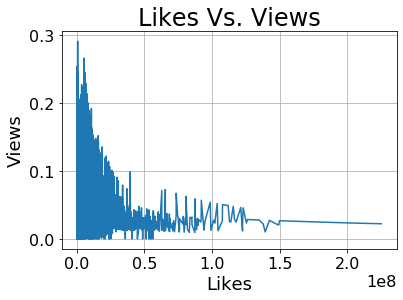

In [32]:
# likes vs. views -- ONE GRAPH BITCHES!!!!
group_line_sorted = new_df_US.sort_values('views')
group_line = plt.plot(group_line_sorted['views'], group_line_sorted['Ratio Likes to Views'])

plt.title('Likes Vs. Views', fontsize=24)
plt.xlabel('Likes', fontsize=18)
plt.ylabel('Views', fontsize=18)
plt.savefig("Ratio_Likes_To_Views_US.png")
plt.grid()
plt.show()

In [33]:
#ORIGINAL INDIA DATAFRAME
youtube_IN_df = pd.read_csv(file_2)
youtube_IN_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...
5,il_pSa5l98w,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...
6,7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...
7,c64I9HNpiOY,17.14.11,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11T06:14:19.000Z,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,https://i.ytimg.com/vi/c64I9HNpiOY/default.jpg,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...
8,KObFEYCaRx8,17.14.11,Chiranjeevi in Naga Chaitanya - Samantha Recep...,Top Telugu Media,24,2017-11-13T04:42:26.000Z,Chiranjeevi in Naga Chaitanya - Samantha Recep...,118223,520,53,23,https://i.ytimg.com/vi/KObFEYCaRx8/default.jpg,False,False,False,Chiranjeevi in Naga Chaitanya - Samantha Recep...
9,g8QsfJhFpjY,17.14.11,New bike vs Old bike - the reality,Jump Cuts,24,2017-11-12T04:30:01.000Z,"Jump cuts|""Jumpcuts""|""Tamil comedy""|""Tamil Com...",969030,59798,1545,2404,https://i.ytimg.com/vi/g8QsfJhFpjY/default.jpg,False,False,False,Jump Cuts is a Tamil entertaining group by Har...


In [34]:
#INDIA likes vs. dislikes
new_df_IN=youtube_IN_df[['video_id','likes', 'dislikes', 'views']].copy()
new_df_IN['Country']='India'
new_df_IN

,video_id,likes,dislikes,views,Country
0,kzwfHumJyYc,33966,798,1096327,India
1,zUZ1z7FwLc8,735,904,590101,India
2,10L1hZ9qa58,2011,243,473988,India
3,N1vE8iiEg64,70353,1624,1242680,India
4,kJzGH0PVQHQ,492,293,464015,India
5,il_pSa5l98w,98612,4185,6106669,India
6,7MxiQ4v0EnE,127477,7134,5718766,India
7,c64I9HNpiOY,132738,8812,10588371,India
8,KObFEYCaRx8,520,53,118223,India
9,g8QsfJhFpjY,59798,1545,969030,India


In [35]:
new_df_IN['Ratio Likes to Views'] = new_df_IN['likes']/new_df_US['views']
new_df_IN

,video_id,likes,dislikes,views,Country,Ratio Likes to Views
0,kzwfHumJyYc,33966,798,1096327,India,0.045386
1,zUZ1z7FwLc8,735,904,590101,India,0.000304
2,10L1hZ9qa58,2011,243,473988,India,0.000630
3,N1vE8iiEg64,70353,1624,1242680,India,0.205010
4,kJzGH0PVQHQ,492,293,464015,India,0.000235
5,il_pSa5l98w,98612,4185,6106669,India,0.827421
6,7MxiQ4v0EnE,127477,7134,5718766,India,0.060605
7,c64I9HNpiOY,132738,8812,10588371,India,0.162325
8,KObFEYCaRx8,520,53,118223,India,0.000629
9,g8QsfJhFpjY,59798,1545,969030,India,0.233198


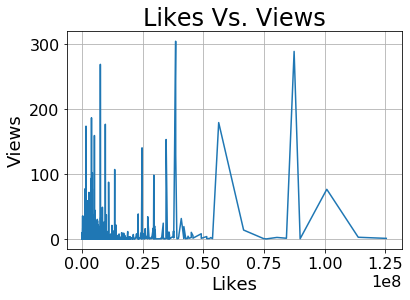

In [36]:
# likes vs. views -- ONE GRAPH BITCHES!!!!
group_line_sorted = new_df_IN.sort_values('views')
group_line = plt.plot(group_line_sorted['views'], group_line_sorted['Ratio Likes to Views'])

plt.title('Likes Vs. Views', fontsize=24)
plt.xlabel('Likes', fontsize=18)
plt.ylabel('Views', fontsize=18)
plt.savefig("Ratio_Likes_To_Views_IN.png")
plt.grid()
plt.show()

In [37]:
#ORIGINAL JAPAN DATAFRAME
youtube_JP_df = pd.read_csv(file_3, encoding='ISO-8859-1')
youtube_JP_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,5ugKfHgsmYw,18.07.02,é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...,æäºéä¿¡æ åã»ã³ã¿ã¼,25,2018-02-06T03:04:37.000Z,"äºæ |""ä½è³""|""ä½è³ç""|""ããªã³ãã¿ã...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,ä½è³çç¥å¼å¸ã®æ°å®¶ã«å¢è½ããé¸ä...
1,ohObafdd34Y,18.07.02,ã¤ããQ ãç¥­ãç·å®®å·Ãæè¶ å·¨å¤§ã...,ç¥è°·ãããª Kamiya Erina 2,1,2018-02-06T04:01:56.000Z,[none],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06T21:38:22.000Z,[none],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN
3,5wNnwChvmsQ,18.07.02,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...,ã¢ã·ã¿ãã¯ãã¤,25,2018-02-06T06:08:49.000Z,ã¢ã·ã¿ãã¯ãã¤,96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,æ±äº¬ãã£ãºãã¼ãªã¾ã¼ãã®å ã­ã£ã...
4,B7J47qFvdsk,18.07.02,æ¦®åå¥ã ãè¡æã®æ­»ãã ãµãï¼æ ç...,ã·ãããã¥ãã¤,1,2018-02-06T02:30:00.000Z,[none],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,å®¶ã«å¸°ã£ã¦ãããµã©ãªã¼ãã³ã®ãã...
5,OIDfjdGERr8,18.07.02,æè³ãã¤ãããã®æ­»å ãå å¤«ã»åç...,æ¿ç½ï¼ï¼ã¹ã¼ãã¼è¸è½ãã£ã³ãã«ï...,22,2018-02-06T03:27:10.000Z,"æè³ãã¤ã|""å «æ¨äºå¸å­""|""æ²³éæ¯å­...",193593,0,0,53,https://i.ytimg.com/vi/OIDfjdGERr8/default.jpg,False,True,False,Twitterå§ãã¾ããï¼\n\nç»é²ãããã...
6,KqtWo-4A0LU,18.07.02,åä¸å¿ ããã¿ã¤ãã«ãå¤§æ¿æï¼ã...,nbsc006,22,2018-02-06T05:31:33.000Z,[none],55465,189,339,800,https://i.ytimg.com/vi/KqtWo-4A0LU/default.jpg,False,False,False,NaN
7,MPQaySneSUc,18.07.02,ç´æLIVE ã°ããã£! 2018å¹´2æ6æ¥ 180206,ãã¤ã­ã³ã° 2018,23,2018-02-06T07:01:29.000Z,[none],66272,51,167,164,https://i.ytimg.com/vi/MPQaySneSUc/default.jpg,False,False,False,ç´æLIVE ã°ããã£! 2018å¹´2æ6æ¥ 180206
8,zIhc0rXajCk,18.07.02,ãã«ã°ã¼ããæ¼«æãããä½ã,com808,23,2018-02-05T23:27:51.000Z,[none],57820,334,76,107,https://i.ytimg.com/vi/zIhc0rXajCk/default.jpg,False,False,False,NaN
9,FVPmVIfl3-o,18.07.02,ç©¶æ¥µã®æ¿ã¦ãä¸¼ã®ä½ãæ¹ã,ã¯ãããè¿·ä½åå ´,19,2018-02-06T06:30:00.000Z,"åµ|""çå­""|""TKG""|""é¤æ²¹""|""ãã¾ãããã...",105112,1547,540,499,https://i.ytimg.com/vi/FVPmVIfl3-o/default.jpg,False,False,False,âãã£ã³ãã«ç»é²ãã­ãããã¾ã\...


In [38]:
# JAPAN likes vs. dislikes
new_df_JP=youtube_JP_df[['video_id','likes', 'dislikes', 'views']].copy()
new_df_JP['Country']='Japan'
new_df_JP

,video_id,likes,dislikes,views,Country
0,5ugKfHgsmYw,591,189,188085,Japan
1,ohObafdd34Y,442,88,90929,Japan
2,aBr2kKAHN6M,165892,2331,6408303,Japan
3,5wNnwChvmsQ,1165,277,96255,Japan
4,B7J47qFvdsk,1336,74,108408,Japan
5,OIDfjdGERr8,0,0,193593,Japan
6,KqtWo-4A0LU,189,339,55465,Japan
7,MPQaySneSUc,51,167,66272,Japan
8,zIhc0rXajCk,334,76,57820,Japan
9,FVPmVIfl3-o,1547,540,105112,Japan


In [39]:
new_df_JP['Ratio Likes to Views'] = new_df_JP['likes']/new_df_US['views']
new_df_JP

,video_id,likes,dislikes,views,Country,Ratio Likes to Views
0,5ugKfHgsmYw,591,189,188085,Japan,0.000790
1,ohObafdd34Y,442,88,90929,Japan,0.000183
2,aBr2kKAHN6M,165892,2331,6408303,Japan,0.051980
3,5wNnwChvmsQ,1165,277,96255,Japan,0.003395
4,B7J47qFvdsk,1336,74,108408,Japan,0.000637
5,OIDfjdGERr8,0,0,193593,Japan,0.000000
6,KqtWo-4A0LU,189,339,55465,Japan,0.000090
7,MPQaySneSUc,51,167,66272,Japan,0.000062
8,zIhc0rXajCk,334,76,57820,Japan,0.000404
9,FVPmVIfl3-o,1547,540,105112,Japan,0.006033


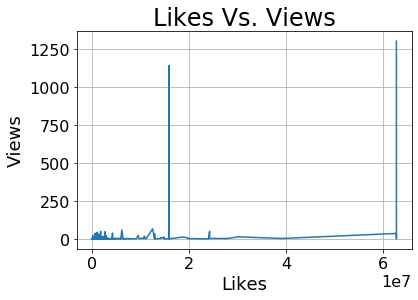

In [40]:
# likes vs. views -- ONE GRAPH BITCHES!!!!
group_line_sorted = new_df_JP.sort_values('views')
group_line = plt.plot(group_line_sorted['views'], group_line_sorted['Ratio Likes to Views'])

plt.title('Likes Vs. Views', fontsize=24)
plt.xlabel('Likes', fontsize=18)
plt.ylabel('Views', fontsize=18)
plt.savefig("Ratio_Likes_To_Views_JP.png")
plt.grid()
plt.show()

In [41]:
# ORIGINAL KOREA DATAFRAME
youtube_KR_df = pd.read_csv(file_4, encoding='ISO-8859-1')
youtube_KR_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,ì¢ì by ë¯¼ì_ì¤ì¢ ì _ì¢ë ëµê°,ë¼í¸ë§ì½ë¦¬ì,22,2017-11-13T07:07:36.000Z,"ë¼í¸ë§|""ì¤ì¢ ì ""|""ì¢ë""|""ì¢ì""|""ì¬ë ...",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ì¤ì¢ ì 'ì¢ë'ì ëµê° 'ì¢ì' ìµì´ ê...
1,hH7wVE8OlQ0,17.14.11,JSA ê·ì ë¶íêµ° ì´ê²© ë¶ì,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""ê·ì""|""ë¶íêµ°""|""ì´ê²©""|""ë¶ì""|""JS...",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±ëAë¨ë ]å ë³ì¬ íì¬ 'ììë¶ëª ...
2,9V8bnWUmE9U,17.14.11,ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...,ëëª°ë¼í¨ë°ë¦¬ í«ì¼,22,2017-11-11T07:16:08.000Z,"ìëë¤ì¤|""ë¹¼ë¹¼ë¡""|""í«ì¼""|""ëëª°ë¼í...",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í¼ê°ì¤ë ê¼­ ì¶ì² ë¶íëë ¤ì
3,0_8py-t5R80,17.14.11,"áá µáá §á¼áá ¡á¨ ì¶êµ­ íì¥, ëì¹...",ë¯¸ëì´ëª½êµ¬,25,2017-11-12T11:19:52.000Z,"ì´ëª ë°|""ì´ëª ë° ì¶êµ­ê¸ì§""|""ì´ëª ë° ...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,ë¤ì¤ë ëêµ¬ê²ëê¹ ë£ê³ ë í íì 
4,bk55RbxiQdI,17.14.11,ê¹ì¥ê²¸ì ë¬¼ë¬ê°ë¤ MBC ë ¸ì¡° íí¸ì...,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""ë ¸ì»·V""|""CBS""|""mbc""|""ê¹ì¥ê²¸""|""í´ì...",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,ê¹ì¥ê²¸ MBC ì¬ì¥ì´ ê²°êµ­ í´ìëë¤.\n...
5,AmP0ryzDmbY,17.14.11,ê¹ì ì ì¬ì¬ë ì ê°ìê¸° ë¬¸ì¬ì¸ ë...,íì°ì¤,25,2017-11-12T10:17:48.000Z,"ê¹ì ì|""ê¹ì ì ì¬ì¬""|""ê¹ì ì ë¬¸ì¬...",188707,545,311,357,https://i.ytimg.com/vi/AmP0ryzDmbY/default.jpg,False,False,False,ê¹ì ì ì¬ì¬ë ì ê°ìê¸° ë¬¸ì¬ì¸ ë...
6,4Nxb_nQDYWo,17.14.11,ìë¥ì ì´ê´ì íì´ë¼ì´í¸ ëª¨ì,ì±ë¦°ì´ì ì¦ê±°ì´ ì íë¸,22,2017-11-12T03:30:47.000Z,"Positive|""Energy""|""Chakra""|""Balancing""|""Healin...",114858,252,40,36,https://i.ytimg.com/vi/4Nxb_nQDYWo/default.jpg,False,False,False,ë§¤ì¼ 2ê° ìì ì ë¡ë ë©ëë¤ ^^\nì¦...
7,cplEUy1zk80,17.14.11,[ì¼ë³¸ë°ì] íêµ­ì´ ì¸ë-ííì ìë...,ë³´ê³ ì¶ìë í´ì¸ë°ì ì´ì,22,2017-11-12T11:40:23.000Z,"ì¼ë³¸|""íêµ­""|""ìë³´ë¼ì¸""|""ì¸ë ííì...",70166,301,37,352,https://i.ytimg.com/vi/cplEUy1zk80/default.jpg,False,False,False,Kevin MacLeodì At Launchì(ë) Creative Co...
8,iToRdbxuMtg,17.14.11,íì¬ ë ¼ëì¤ì¸ íë ë¨¸ë¦¬ì±ë¨,ê¶ê¸íí,22,2017-11-12T18:52:16.000Z,"íë|""íë ë²ì¤í¹""",65547,91,207,154,https://i.ytimg.com/vi/iToRdbxuMtg/default.jpg,False,False,False,íë ëì¤ ë²ì¤í¹íëë° ê°ìê¸° ì¬...
9,poY-l_1poYA,17.14.11,"[íí¬ìì¬] 5í - 'ë§ë¥ì´' ê¹íì , ì...",íí¬ìì¬,22,2017-11-13T10:32:37.000Z,"ìì¡°ì´ì»¤í|""ìì°¾ì¬""|""ìë¯¼ì""|""ìë...",17868,312,0,4,https://i.ytimg.com/vi/poY-l_1poYA/default.jpg,False,False,False,ìì°¾ì¬ 'ë§ë¥ì´'ë¡ ì°ë¦¬ìê² ìµìí...


In [42]:
#KOREA likes vs. dislikes
new_df_KR=youtube_KR_df[['video_id','likes', 'dislikes', 'views']].copy()
new_df_KR['Country']='Korea'
new_df_KR

,video_id,likes,dislikes,views,Country
0,RxGQe4EeEpA,1422,40,156130,Korea
1,hH7wVE8OlQ0,211,28,76533,Korea
2,9V8bnWUmE9U,5112,166,421409,Korea
3,0_8py-t5R80,2093,173,222850,Korea
4,bk55RbxiQdI,1094,109,84466,Korea
5,AmP0ryzDmbY,545,311,188707,Korea
6,4Nxb_nQDYWo,252,40,114858,Korea
7,cplEUy1zk80,301,37,70166,Korea
8,iToRdbxuMtg,91,207,65547,Korea
9,poY-l_1poYA,312,0,17868,Korea


In [43]:
new_df_KR['Ratio Likes to Views'] = new_df_KR['likes']/new_df_US['views']
new_df_KR

,video_id,likes,dislikes,views,Country,Ratio Likes to Views
0,RxGQe4EeEpA,1422,40,156130,Korea,0.001900
1,hH7wVE8OlQ0,211,28,76533,Korea,0.000087
2,9V8bnWUmE9U,5112,166,421409,Korea,0.001602
3,0_8py-t5R80,2093,173,222850,Korea,0.006099
4,bk55RbxiQdI,1094,109,84466,Korea,0.000522
5,AmP0ryzDmbY,545,311,188707,Korea,0.004573
6,4Nxb_nQDYWo,252,40,114858,Korea,0.000120
7,cplEUy1zk80,301,37,70166,Korea,0.000368
8,iToRdbxuMtg,91,207,65547,Korea,0.000110
9,poY-l_1poYA,312,0,17868,Korea,0.001217


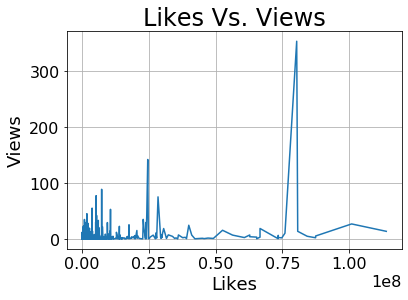

In [44]:
# likes vs. views -- ONE GRAPH BITCHES!!!!
group_line_sorted = new_df_KR.sort_values('views')
group_line = plt.plot(group_line_sorted['views'], group_line_sorted['Ratio Likes to Views'])

plt.title('Likes Vs. Views', fontsize=24)
plt.xlabel('Likes', fontsize=18)
plt.ylabel('Views', fontsize=18)
plt.savefig("Ratio_Likes_To_Views_KR.png")
plt.grid()
plt.show()

In [45]:
#ORIGINAL RUSSIA DATAFRAME
youtube_RU_df = pd.read_csv(file_5, encoding='ISO-8859-1')
youtube_RU_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,ÐÐ°Ñ Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...,Ð¢âÐ ÐÐÐÐÐ§,22,2017-11-13T09:09:31.000Z,"Ð·Ð°Ñ Ð°Ñ Ð¸ Ð¿Ð¾Ð»Ð¸Ð½Ð°|""ÑÑÐ¸Ð¼ÑÑ ÑÐºÐ...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"ÐÐ½Ð°ÐºÐ¾Ð¼ÑÑÐµÑÑ, ÑÑÐ¾ ÐÐ°Ñ Ð°Ñ Ð¸ Ð..."
1,AOCJIFEA_jE,17.14.11,ÐÐ¸ÑÐ¶Ð° ÐÐµÐ¼Ð¾Ð² #29. ÐÐ¾Ð»ÑÑÐ¾Ð¸Ì Ð²...,Druzhko Show,22,2017-11-13T17:32:11.000Z,"Ð±Ð¸ÑÐ¶Ð° Ð¼ÐµÐ¼Ð¾Ð²|""Ð»ÐµÐ² ÑÐ°Ð³Ð¸Ð½ÑÐ½""|...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,Ð 29 Ð²ÑÐ¿ÑÑÐºÐµ ÐÑÑÐ¶ÐºÐ¾ Ð¨Ð¾Ñ Ð¡ÐµÑ...
2,VAWNQDgwwOM,17.14.11,Ð¥ÐÐÐ ÐÐ­ÐÐ - Ð¡ÐÐÐ Ð¡Ð ÐÐÐ Ð§Ð£Ð...,Ð®Ð»Ð¸Ðº,24,2017-11-13T16:11:31.000Z,"ÑÐ¼Ð¾Ñ|""ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ""|""Ð²Ð»Ð¾Ð³""|""Ð±Ð»Ð¾Ð³...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Ð¤Ð°ÐºÑÐ»ÑÑ...
3,gknkFwKQfHg,17.14.11,Ð¡Ð¾ÑÐ½Ð°Ñ ÐºÐµÑÐ°Ð´Ð¸Ð»ÑÑ Ñ ÐºÑÑÐ¸ÑÐµÐ¹,Hochland,22,2017-11-13T06:51:10.000Z,"Ñ Ð¾Ñ Ð»Ð°Ð½Ð´|""ÑÑÑ""|""ÑÐµÑÐµÐ¿ÑÑ""|""ÐºÐ°...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** ÐºÐ°Ðº Ð³Ð¾ÑÐ¾Ð²Ð¸ÑÑ ÑÐµÑÑÐ¾ÑÐ°Ð½Ð½...
4,3sYvZcwzZr8,17.14.11,ÐÐÐÐÐ« Ð ÐÐÐÐ¢ÐÐÐÐ ÐÐ Ð¨ÐÐÐÐ¬Ð...,Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½,24,2017-11-13T16:52:36.000Z,"Ð¡Ð¾Ð²ÐµÑÐ³Ð¾Ð½|""Sovergon""|""ÐºÐ»Ð¸Ð¿Ñ""|""ÑÐ¾...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,â ÐÐÐÐÐ£Ð Ð¡ ÐÐÐÐÐ¢ÐÐÐ«: http://ka...
5,SLF34Gt_UxQ,17.14.11,ÐÐÐÐÐ¡ / Versus Fresh Blood 4: ÐÐ¾Ð¹Ð½Ð° ...,versusbattleru,24,2017-11-12T17:50:31.000Z,[none],733936,47964,2545,3901,https://i.ytimg.com/vi/SLF34Gt_UxQ/default.jpg,False,False,False,Ð£ÑÐ°ÑÑÐ²Ð¾Ð²Ð°ÑÑ Ð² Ð¿ÑÐ¾ÐµÐºÑÐµ Ð´Ð¾Ð...
6,YVcroDDi24s,17.14.11,ÐÐÐÐÐ ÐÐÐÐ Ð§ÐÐÐÐÐÐÐ + 1 Ð ÐÐ...,Ð¢ÐÐÐÐÐ¡,28,2017-11-12T17:19:59.000Z,"ÑÐ¾Ð¿Ð»ÐµÑ|""ÑÐ½ ÑÐ¾Ð¿Ð»ÐµÑ""|""ÑÐ½ Ð»Ð°Ð¿Ð...",1131851,78692,2427,4114,https://i.ytimg.com/vi/YVcroDDi24s/default.jpg,False,False,False,Ð¤Ð°ÐºÑÐ»ÑÑÐµÑ ÐÐ°Ð¿Ð¸ÑÐ°Ð½Ñ Ð Ð¾ÑÑÐ¸...
7,TZdNwUSgRHc,17.14.11,Ð ÐÐ¦ Ð½ÐµÐ·Ð°ÐºÐ¾Ð½Ð½Ð¾ ÑÑÑÐ¾Ð¸Ñ Ñ ÑÐ°Ð...,ÐÐµÑ Ð·Ð°ÑÑÑÐ¾Ð¹ÐºÐµ Ð±ÐµÐ· ÑÐ¾Ð³Ð»Ð°ÑÐ¸Ñ,22,2017-11-13T06:29:09.000Z,[none],97006,2259,330,887,https://i.ytimg.com/vi/TZdNwUSgRHc/default.jpg,False,False,False,Ð¡ÑÑÐ¾Ð¸ÑÐµÐ»Ð¸ Ð½Ð°Ð¿Ð°Ð´Ð°ÑÑ Ð½Ð° Ð¼ÑÐ...
8,YxEJVGfP74Y,17.14.11,ÐÑÐ°Ð»ÑÑÐ½ÑÑ VS ÑÑÑÑÐºÐ°Ñ Ð½Ð°ÑÐ¾Ð...,ÐÑÐ°Ð»ÑÑÐ½ÑÑ by Kuzno Productions,24,2017-11-13T17:22:55.000Z,"ÐÑÐ°Ð»ÑÑÐ½ÑÑ|""ÑÐ¼Ð¾ÑÐ¸Ð¾Ð½Ð°Ð»ÑÐ½ÑÐµ...",105116,9780,93,1184,https://i.ytimg.com/vi/YxEJVGfP74Y/default.jpg,False,False,False,ÐÐ½Ð¸Ð¼Ð°Ð½Ð¸Ðµ! Ð¡ÑÑÐ¸Ð¼ Ñ ÐÐ»ÐµÑÑÐ°Ð½...
9,oZYT_vC4-pc,17.14.11,ÐÐÐ 2017 ÐÑÑÑÐ°Ñ Ð»Ð¸Ð³Ð° ÐÑÐ¾ÑÐ°Ñ...,ÐÑÐ¸ÑÐ¸Ð°Ð»ÑÐ½ÑÐ¹ ÐºÐ°Ð½Ð°Ð» ÐÐÐ,23,2017-11-12T22:00:03.000Z,"KVN|""ÐÐÐ""|""ÐºÐ°Ð¼ÐµÐ´Ð¸""|""comedy""|""Ð¿ÑÐ¸Ðº...",442228,3194,5985,3218,https://i.ytimg.com/vi/oZYT_vC4-pc/default.jpg,False,False,False,ÐÐÐ 2017 ÐÑÑÑÐ°Ñ Ð»Ð¸Ð³Ð° ÐÑÐ¾ÑÐ°Ñ...


In [46]:
# RUSSIA likes vs. dislikes
new_df_RU=youtube_RU_df[['video_id','likes', 'dislikes', 'views']].copy()
new_df_RU['Country']='Russia'
new_df_RU

,video_id,likes,dislikes,views,Country
0,gDuslQ9avLc,334,190,62408,Russia
1,AOCJIFEA_jE,43841,2244,330043,Russia
2,VAWNQDgwwOM,49854,714,424596,Russia
3,gknkFwKQfHg,3566,122,112851,Russia
4,3sYvZcwzZr8,36216,631,243469,Russia
5,SLF34Gt_UxQ,47964,2545,733936,Russia
6,YVcroDDi24s,78692,2427,1131851,Russia
7,TZdNwUSgRHc,2259,330,97006,Russia
8,YxEJVGfP74Y,9780,93,105116,Russia
9,oZYT_vC4-pc,3194,5985,442228,Russia


In [47]:
new_df_RU['Ratio Likes to Views'] = new_df_RU['likes']/new_df_US['views']
new_df_RU

,video_id,likes,dislikes,views,Country,Ratio Likes to Views
0,gDuslQ9avLc,334,190,62408,Russia,0.000446
1,AOCJIFEA_jE,43841,2244,330043,Russia,0.018125
2,VAWNQDgwwOM,49854,714,424596,Russia,0.015621
3,gknkFwKQfHg,3566,122,112851,Russia,0.010391
4,3sYvZcwzZr8,36216,631,243469,Russia,0.017281
5,SLF34Gt_UxQ,47964,2545,733936,Russia,0.402450
6,YVcroDDi24s,78692,2427,1131851,Russia,0.037412
7,TZdNwUSgRHc,2259,330,97006,Russia,0.002763
8,YxEJVGfP74Y,9780,93,105116,Russia,0.011839
9,oZYT_vC4-pc,3194,5985,442228,Russia,0.012456


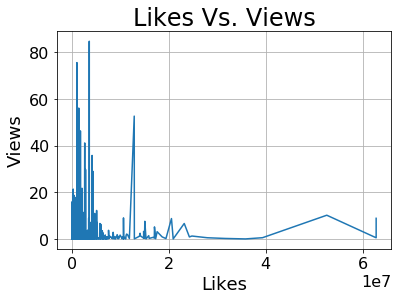

In [48]:
# likes vs. views -- ONE GRAPH BITCHES!!!!
group_line_sorted = new_df_RU.sort_values('views')
group_line = plt.plot(group_line_sorted['views'], group_line_sorted['Ratio Likes to Views'])
plt.title('Likes Vs. Views', fontsize=24)
plt.xlabel('Likes', fontsize=18)
plt.ylabel('Views', fontsize=18)
plt.savefig("Ratio_Likes_To_Views_RU.png")
plt.grid()
plt.show()

In [49]:
combine_countries = pd.concat([new_df_US, new_df_IN, new_df_JP, new_df_KR, new_df_RU], ignore_index=True, sort =False)
combine_countries

,video_id,likes,dislikes,views,Country,Ratio Likes to Views
0,2kyS6SvSYSE,57527,2966,748374,United States,0.076869
1,1ZAPwfrtAFY,97185,6146,2418783,United States,0.040179
2,5qpjK5DgCt4,146033,5339,3191434,United States,0.045758
3,puqaWrEC7tY,10172,666,343168,United States,0.029641
4,d380meD0W0M,132235,1989,2095731,United States,0.063097
5,gHZ1Qz0KiKM,9763,511,119180,United States,0.081918
6,39idVpFF7NQ,15993,2445,2103417,United States,0.007603
7,nc99ccSXST0,23663,778,817732,United States,0.028937
8,jr9QtXwC9vc,3543,119,826059,United States,0.004289
9,TUmyygCMMGA,12654,1363,256426,United States,0.049348


In [50]:
grouped_combined_countries = combine_countries.groupby('Country')
grouped_combined_countries.mean()

,likes,dislikes,views,Ratio Likes to Views
Country,,,,
India,27082.717659,1665.081977,1.060478e+06,0.265140
Japan,8059.586708,366.823613,2.620215e+05,0.222075
Korea,12186.418029,539.097955,4.249473e+05,0.109074
Russia,12435.221557,1475.199612,2.407152e+05,0.085911
United States,74266.702435,3711.400889,2.360785e+06,0.034413


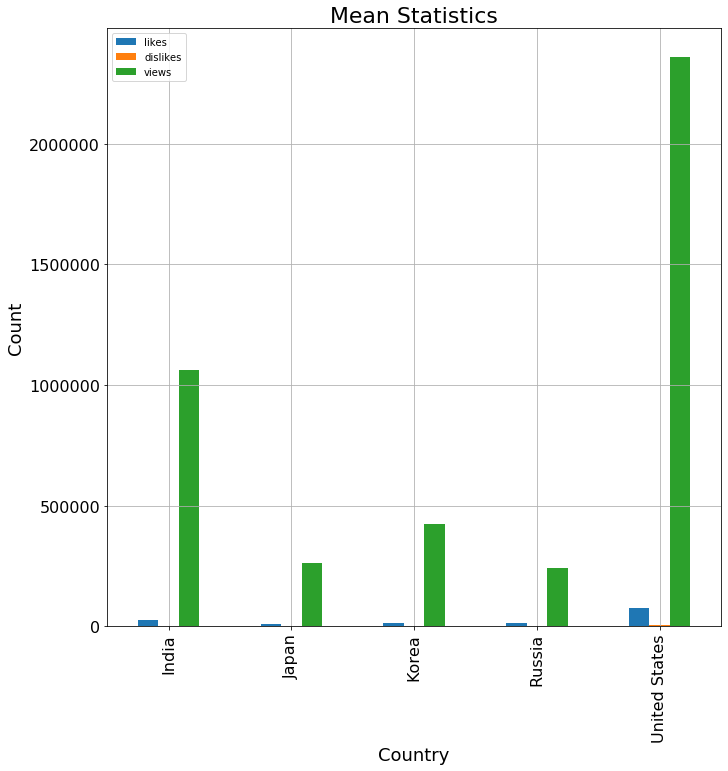

In [51]:
group_combined_countries_chart = grouped_combined_countries['likes', 'dislikes', 'views'].mean()
group_chart = group_combined_countries_chart.plot(kind="bar", fontsize=16)
# plt.figure(figsize = (18, 10))
#fig, ax = plt.subplots(figsize=(20,10))
plt.xlabel('Country', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Mean Statistics', fontsize=22)
fig = plt.gcf()
fig.set_size_inches(11, 11)
plt.savefig("Mean_Statistics.png")
plt.grid()
plt.show()